Vaidehi Shende
D1-24
Practical 4

Exp-4A Generate 61 points fortarget = sin x , where x ∈ [−3, 3]. Use this dataset to train
two layer neural networks using gradient descent learning algorithm. Draw two curves with
different colours, for target and output(y) of the trained neural network.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-3,3,61)
y_true = np.sin(x)

In [3]:
np.random.seed(42)
input_size = 1
hidden_size = 10
output_size = 1

In [4]:
W1 = np.random.randn(input_size,hidden_size)
b1 = np.zeros((1,hidden_size))
W2 = np.random.randn(hidden_size,output_size)
b2 = np.zeros((1,output_size))

In [5]:
def relu(z):
    return np.maximum(0,z)

In [6]:
learning_rate = 0.01
epochs = 1000
for epoch in range(epochs):
    z1 = np.dot(x.reshape(-1,1),W1) + b1
    A1 = relu(z1)
    Z2 = np.dot(A1,W2)+ b2
    y_pred = Z2.flatten()
    loss = np.mean ((y_pred - y_true) ** 2)

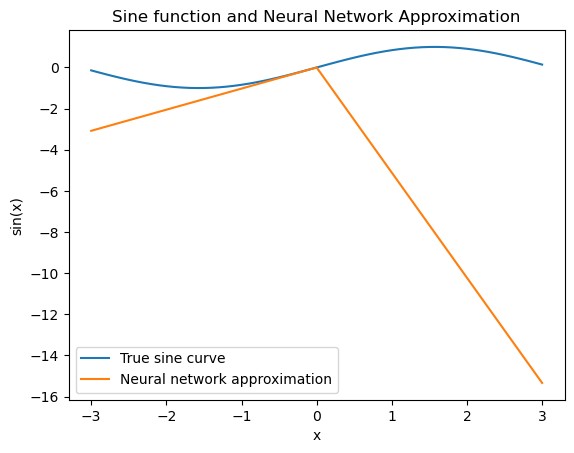

In [7]:
plt.plot(x,y_true, label='True sine curve')
plt.plot(x,y_pred,label='Neural network approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Sine function and Neural Network Approximation')
plt.show()

Exp-4A another way

In [8]:
x = np.linspace(-3,3,61)
y_true = np.sin(x)

In [9]:
input_size = 1
hidden_size = 10
output_size = 1

In [10]:
np.random.seed(42)
W1 = np.random.randn(input_size,hidden_size)
b1 = np.zeros((1,hidden_size))
W2 = np.random.randn(hidden_size,output_size)
b2 = np.zeros((1,output_size))

In [11]:
def relu(z):
    return np.maximum(0,z)
def relu_deriv(z):
    return (z > 0).astype(float)

In [12]:
learning_rate = 0.01
epochs = 10000
losses = []

In [13]:
for epoch in range(epochs):
    Z1 = np.dot(x.reshape(-1,1),W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1,W2) + b2
    y_pred = Z2
    
    loss = np.mean((y_pred.flatten() - y_true) / y_true.size)
    losses.append(loss)

In [14]:
d_loss_y_pred = 2* (y_pred.flatten() - y_true ) / y_true.size
d_loss_y_pred = d_loss_y_pred.reshape(-1,1)

In [15]:
d_loss_Z2 = d_loss_y_pred
d_loss_A1 = np.dot(d_loss_Z2,W2.T)
d_loss_W2 = np.dot(A1.T,d_loss_Z2)
d_loss_b2 = np.sum(d_loss_Z2, axis = 0, keepdims = True)
d_loss_Z1 = d_loss_A1 * relu_deriv(Z1)
d_loss_W1 = np.dot(x.reshape(-1,1).T, d_loss_Z1)
d_loss_b1 = np.sum(d_loss_Z1, axis = 0 , keepdims = True)

W1 -= learning_rate * d_loss_W1
b1 -= learning_rate * d_loss_b1
W2 -= learning_rate * d_loss_W2
b2 -= learning_rate * d_loss_b2

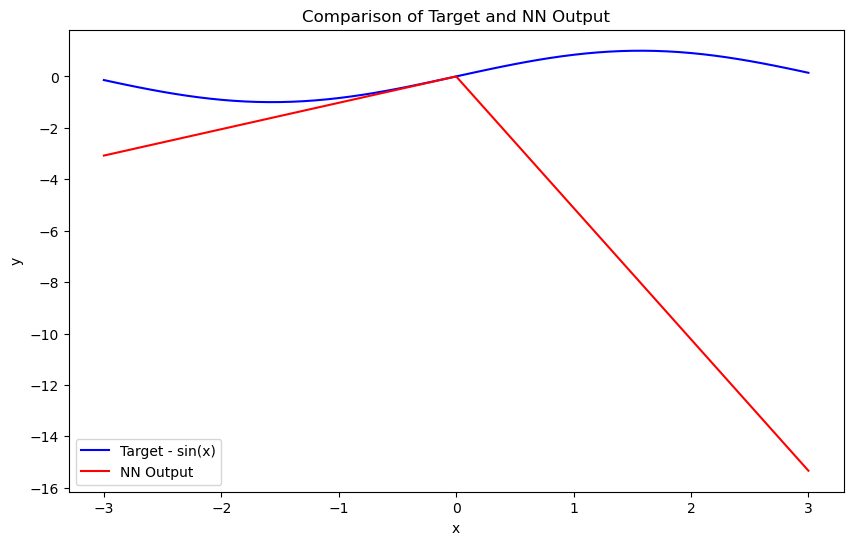

In [16]:
plt.figure(figsize=(10,6))
plt.plot(x,y_true,label = 'Target - sin(x)',color ='blue')
plt.plot(x,y_pred.flatten(),label='NN Output',color ='red')
plt.title('Comparison of Target and NN Output')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Exp-4B Use MNIST dataset to train neural networks using gradient descent learning
algorithm.Experiments with various Architectures of neural networks, and with different
activation functions for hidden and output layers.

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [19]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [20]:
def create_model(hidden_layers = 1,neurons = 64,activation='relu',input_shape=(28,28)):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = input_shape))
    for _ in range(hidden_layers):
        model.add(layers.Dense(neurons,activation= activation))
    model.add(layers.Dense(10,activation='softmax'))
    return model

In [21]:
model= create_model(hidden_layers = 2,neurons=64,activation='relu',input_shape=(28,28))
model.compile(optimizer ='sgd',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
history = model.fit(X_train,y_train,epochs = 10, validation_split = 0.1)

Epoch 1/10


1688/1688 [==============================] - 6s 3ms/step - loss: 0.7605 - accuracy: 0.7950 - val_loss: 0.2942 - val_accuracy: 0.9185
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3197 - accuracy: 0.9084 - val_loss: 0.2334 - val_accuracy: 0.9332
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2665 - accuracy: 0.9232 - val_loss: 0.2031 - val_accuracy: 0.9430
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2343 - accuracy: 0.9326 - val_loss: 0.1860 - val_accuracy: 0.9458
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2105 - accuracy: 0.9395 - val_loss: 0.1676 - val_accuracy: 0.9533
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1904 - accuracy: 0.9448 - val_loss: 0.1527 - val_accuracy: 0.9582
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1737 - accuracy: 0.9494 - val_loss: 0.1449 - val_accurac

In [24]:
test_loss,test_acc  = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1384 - accuracy: 0.9590


In [25]:
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9590
